In [1]:
from BorderModel import smooth
from dbhelper import get_crossings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = get_crossings()

In [3]:
df

,location_id,lane_id,direction_id,location_name,lane_name,direction_name
id,,,,,,
15,136,0,0,Lynden,Car,Northbound
16,136,0,1,Lynden,Car,Southbound
17,136,4,0,Lynden,Truck,Northbound
18,136,4,1,Lynden,Truck,Southbound
8,135,2,0,Pacific Highway,Bus,Northbound
7,135,2,1,Pacific Highway,Bus,Southbound
6,135,0,0,Pacific Highway,Car,Northbound
5,135,0,1,Pacific Highway,Car,Southbound
10,135,3,0,Pacific Highway,Fast,Northbound


In [4]:
crossings = df[df.lane_name=='Car']

In [5]:
crossings

,location_id,lane_id,direction_id,location_name,lane_name,direction_name
id,,,,,,
15,136,0,0,Lynden,Car,Northbound
16,136,0,1,Lynden,Car,Southbound
6,135,0,0,Pacific Highway,Car,Northbound
5,135,0,1,Pacific Highway,Car,Southbound
2,134,0,0,Peace Arch,Car,Northbound
1,134,0,1,Peace Arch,Car,Southbound
19,137,0,0,Sumas,Car,Northbound
20,137,0,1,Sumas,Car,Southbound


In [6]:
crossings.index.values

array([15, 16,  6,  5,  2,  1, 19, 20])

## Test smooth function

In [7]:
dftest = smooth(2, 15, 'volume', limit=500)

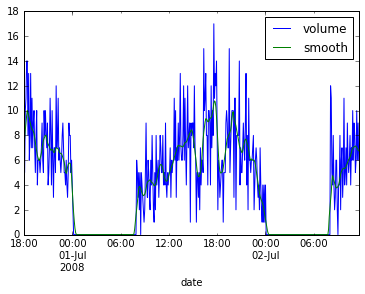

In [8]:
dftest.set_index('date').plot();

## Smooth in parallel

In [19]:
from IPython.parallel import Client
rc = Client()

In [20]:
dview = rc[:]

In [24]:
prlist = [dview.apply_async(smooth, 2, xing, 'volume', path='/Users/jng/galvanize/BorderCrossing/data') for xing in crossings.index.values]

In [25]:
prlist[0].ready()

False

Example import code
```
copy mungedata from '/Users/jng/galvanize/BorderCrossing/data/munge2_1_volume.csv' (HEADER TRUE, DELIMITER ',', FORMAT 'csv');
```

## Smooth southbound Nexus lanes 

In [26]:
prlist = [dview.apply_async(smooth, 2, xing, 'volume', path='/Users/jng/galvanize/BorderCrossing/data') for xing in [3, 11]]

In [31]:
prlist[0].ready()

False

In [28]:
prlist = [dview.apply_async(smooth, 2, xing, 'waittime', path='/Users/jng/galvanize/BorderCrossing/data') for xing in [3, 11]]

In [30]:
prlist[0].ready()

False